# Example 2-2: Quiver plots

```{admonition} Important!
:class: tip
If you're completely new to Python, you may want to go through the exercises in the {doc}`../tutorials/1_fund-python_blank` notebook first!
```

While the majority of this class will be spent on solving ordinary differential equations (ODEs) analytically and numerically, a key aspect of verifying the correctness of our solution is by plotting it.
In this example, we will show how to make arrow plots that represent the direction field in a region (you may have seen these plots in the context of vector fields in CME 100).

## Summary of commands

In this exercise, we will demonstrate the following:
- [**Numpy**](https://numpy.org/doc/stable/index.html)
    - [`np.linspace(start, stop, num)`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) - Returns `num` evenly spaced numbers between `start` and `stop` (inclusive).
    - [`np.meshgrid(x, y)`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) - Create a 2D grid of coordinate values based on 1D `x` and `y` arrays.
        - The result is two `X` and `Y` _2D arrays_ with the corresponding 1D arrays tiled across the other dimension.
    - [`np.ones(shape)`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) - Returns an array of the given shape of all `1`s.
    - Common functions like [`np.sqrt(x)`](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) and [`np.exp(x)`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) for $\sqrt{x}$ and $e^{x}$, respectively, of an array `x` (element-wise).
- [**Matplotlib**](https://matplotlib.org/stable/)
    - [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) - Create Figure and Axes objects for plotting. Many possible parameters.
    - [`ax.quiver(X, Y, U, V)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiver.html) - Plot a field of arrows at the given locations `X,Y` pointing in `U,V`.
    - [`ax.plot(x, y, ...)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) - Create a scatter/line plot in 1D, `y` vs. `x`. Many styles possible.
    - [`ax.set(...)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html) - Set axes `xlabel`, `ylabel`, `xlim`, `ylim`, `title`, etc.

## Direction field

An object of mass $m$ is dropped with an initial velocity $v_0$, and is falling under the force of gravity (constant acceleration $g$) and the effect of air friction. 
It is our desire to find an ODE governing the velocity $v(t)$ of the object. 

It can be shown that the governing ODE and its initial conditions are:

$$ \frac{dv}{dt} = - \frac{\gamma}{m} v + g; \qquad v(0) = v_0 $$

Now we'll create a direction field plot for the range $0 \le t \le 10$ and $40 \le v(0) \le 60$.
This leverages the `ax.quiver()` command to plot arrows over a `np.meshgrid()` of points.
We will also superimpose the exact solutions (you can verify this to be 

$$ v = \frac{g}{K} + \left( v_0 - \frac{g}{K} \right) \exp \left( -K t \right) $$ 

through direct integration, where $K = \dfrac{\gamma}{m}$) and add some informative plot styling.

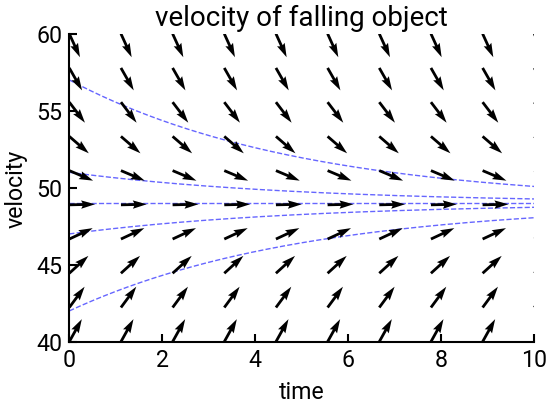

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# constants
g = 9.8
K = 0.2

# set up grid w/ limits
t = np.linspace(0, 10, 10)
y = np.linspace(40, 60, 10)
[T, Y] = np.meshgrid(t, y)

# create arrays for arrows - see course reader for details
v_t = np.ones(T.shape)    # set t-component of all vectors to 1
v_y = -K * Y + g          # calculate y-component
v_len = np.sqrt(v_t**2 + v_y**2)   # calculate vector length
v_t = v_t / v_len         # normalize
v_y = v_y / v_len         # normalize

# draw plot
fig, ax = plt.subplots()
ax.quiver(T, Y, v_t, v_y)
ax.set(xlabel='time', ylabel='velocity', title="velocity of falling object", 
       xlim=[0, 10], ylim=[40, 60])

# plot exact solutions with specific initial positions
y0 = [42, 47, 49, 51, 57]
t2 = np.linspace(0, max(t), 1000)
for yi in y0:
    y2 = g / K + (yi - g / K) * np.exp(-K * t2)
    ax.plot(t2, y2, 'b--', lw=1, alpha=0.6, zorder=-5)
plt.show()